In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression, Ridge # models we are going to use
from sklearn.metrics import r2_score # for comparing the predicted and test values
import seaborn as sns;

In [2]:
df_1 = pd.read_csv('chipVariantCalling_run1.tsv', sep = '\t')
df_2 = pd.read_csv('chipVariantCalling_run2.tsv', sep = '\t', low_memory=False)

In [3]:
df_1.chipOrControl.unique()

array(['CHIP', 'Control', 'Blank', 'Unknown', nan], dtype=object)

In [4]:
#cleaning df_1
known1 = df_1[df_1['chipOrControl'].isin(['CHIP', 'Control'])]
df1 = known1.drop_duplicates()
#bl_1 = df1.loc[df1.sampleTimePt == "Baseline"]            #IDK if this is needed
#y3_1 = df1.loc[df1.sampleTimePt == "Y3"]

df1.head()           # Only has CHIP or Control known values

,d.barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,4010289633,7281,26,0.0036,0.0033,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.0,1.182210,CHIP
4,4010289633,7282,29,0.0040,0.0036,MODERATE,GNB1,chr1:1747250_T/C,Baseline,Male,MS2083,2:2,3639:3606,15:14,32.7,1.061729,CHIP
8,4010289633,7282,24,0.0033,0.0033,MODERATE,GNB1,chr1:1747256_T/C,Baseline,Male,MS2083,2:2,3626:3607,12:12,34.9,1.005270,CHIP
12,4010289633,178,2,0.0112,0.0120,MODERATE,NRAS,chr1:115256571_T/C,Baseline,Male,MS2083,2:2,88:88,1:1,37.0,1.000000,CHIP
13,4010289633,1773,6,0.0034,0.0035,MODERATE,NRAS,chr1:115258674_T/C,Baseline,Male,MS2083,2:2,889:874,3:3,37.0,1.017150,CHIP


In [38]:
#cleaning df_2
known2 = df_2[df_2['chipOrControl'].isin(['CHIP', 'Control'])]
df2 = known2.drop_duplicates()
df2 = df2.rename(columns={"d.barcode": "barcode"})
#bl_2 = df2.loc[df2.sampleTimePt == "Baseline"]            #IDK if this is needed
#y3_2 = df2.loc[df2.sampleTimePt == "Y3"]

df2.head()           # Only has CHIP or Control known values

,barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,4010289633,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Baseline,Male,MS2083,2:2,940:982,3:3,35.0,1.04467,CHIP
5,4010289633,2036,7,0.0034,0.0035,MODERATE,GNB1,chr1:1747198_G/A,Baseline,Male,MS2083,2:2,1007:1019,3:4,35.3,1.31745,CHIP
9,4010289633,2040,5,0.0025,0.0021,MODERATE,GNB1,chr1:1747220_C/T,Baseline,Male,MS2083,2:2,1002:1014,2:3,31.8,1.48196,CHIP
13,4010289633,2041,6,0.0029,0.0025,MODERATE,GNB1,chr1:1747238_G/A,Baseline,Male,MS2083,2:2,1008:1025,3:3,32.7,1.01686,CHIP
17,4010289633,2037,5,0.0025,0.0028,MODERATE,GNB1,chr1:1747256_T/C,Baseline,Male,MS2083,2:2,920:1028,2:3,32.2,1.34221,CHIP


In [14]:
df1.isna().any()

d.barcode        False
DP               False
VD               False
AF               False
HIAF             False
IMPACT           False
SYMBOL           False
loci             False
sampleTimePt     False
gender           False
MSID             False
BIAS             False
REFBIAS          False
VARBIAS          False
QUAL             False
ODDRATIO         False
chipOrControl    False
dtype: bool

In [22]:
x = df1['d.barcode'].unique()
len(x)

176

In [39]:
df2

,barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,4010289633,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Baseline,Male,MS2083,2:2,940:982,3:3,35.0,1.044670,CHIP
5,4010289633,2036,7,0.0034,0.0035,MODERATE,GNB1,chr1:1747198_G/A,Baseline,Male,MS2083,2:2,1007:1019,3:4,35.3,1.317450,CHIP
9,4010289633,2040,5,0.0025,0.0021,MODERATE,GNB1,chr1:1747220_C/T,Baseline,Male,MS2083,2:2,1002:1014,2:3,31.8,1.481960,CHIP
13,4010289633,2041,6,0.0029,0.0025,MODERATE,GNB1,chr1:1747238_G/A,Baseline,Male,MS2083,2:2,1008:1025,3:3,32.7,1.016860,CHIP
17,4010289633,2037,5,0.0025,0.0028,MODERATE,GNB1,chr1:1747256_T/C,Baseline,Male,MS2083,2:2,920:1028,2:3,32.2,1.342210,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693014,4010289816,4820,16,0.0033,0.0025,MODERATE,BRCC3,chrX:154306961_T/C,Y3,Female,MS6625,2:2,2410:2364,5:11,25.0,2.242460,Control
693021,4010289816,4805,13,0.0027,0.0027,MODERATE,BRCC3,chrX:154306969_T/C,Y3,Female,MS6625,2:2,2385:2383,6:7,35.0,1.167610,Control
693028,4010289816,4788,133,0.0278,0.0199,MODERATE,BRCC3,chrX:154306974_T/G,Y3,Female,MS6625,2:2,2256:2377,121:12,27.2,10.620221,Control
693035,4010289816,4788,14,0.0029,0.0030,MODERATE,BRCC3,chrX:154306976_T/C,Y3,Female,MS6625,2:2,2372:2376,7:7,37.0,1.001683,Control


In [25]:
df1.describe()

,d.barcode,DP,VD,AF,HIAF,QUAL,ODDRATIO
count,1.219360e+05,121936.000000,121936.000000,121936.000000,121936.000000,121936.000000,121936.000000
mean,4.010290e+09,5295.314009,128.461800,0.010620,0.010656,35.418086,1.618435
std,5.311253e+01,12678.412153,2821.706231,0.065492,0.065854,2.573278,43.551910
min,4.010290e+09,2.000000,2.000000,0.002500,0.001500,22.500000,0.000000
25%,4.010290e+09,521.000000,2.000000,0.002800,0.002800,34.700000,1.012780
50%,4.010290e+09,1031.000000,4.000000,0.003500,0.003500,37.000000,1.022390
75%,4.010290e+09,4213.250000,14.000000,0.005200,0.005300,37.000000,1.038983
max,4.010290e+09,455487.000000,319533.000000,1.000000,1.000000,37.000000,14285.714286


In [26]:
df2.describe()

,d.barcode,DP,VD,AF,HIAF,QUAL,ODDRATIO
count,1.576760e+05,157676.000000,157676.000000,157676.000000,157676.000000,157676.000000,157676.000000
mean,4.010290e+09,2983.684695,52.948394,0.011444,0.011375,32.173670,2.351721
std,5.375535e+01,5137.808401,1073.826336,0.058150,0.059520,4.415608,18.145123
min,4.010290e+09,2.000000,2.000000,0.002500,0.001500,22.500000,0.000000
25%,4.010290e+09,724.000000,3.000000,0.002900,0.002800,28.300000,1.016450
50%,4.010290e+09,1561.000000,6.000000,0.003700,0.003700,33.000000,1.098992
75%,4.010290e+09,3320.000000,13.000000,0.006000,0.005800,37.000000,1.645776
max,4.010290e+09,216036.000000,173172.000000,1.000000,1.000000,37.000000,3571.428571


In [41]:
df2[df2.barcode == 4010289633]

,barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,4010289633,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Baseline,Male,MS2083,2:2,940:982,3:3,35.0,1.04467,CHIP
5,4010289633,2036,7,0.0034,0.0035,MODERATE,GNB1,chr1:1747198_G/A,Baseline,Male,MS2083,2:2,1007:1019,3:4,35.3,1.31745,CHIP
9,4010289633,2040,5,0.0025,0.0021,MODERATE,GNB1,chr1:1747220_C/T,Baseline,Male,MS2083,2:2,1002:1014,2:3,31.8,1.48196,CHIP
13,4010289633,2041,6,0.0029,0.0025,MODERATE,GNB1,chr1:1747238_G/A,Baseline,Male,MS2083,2:2,1008:1025,3:3,32.7,1.01686,CHIP
17,4010289633,2037,5,0.0025,0.0028,MODERATE,GNB1,chr1:1747256_T/C,Baseline,Male,MS2083,2:2,920:1028,2:3,32.2,1.34221,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,4010289633,698,2,0.0029,0.0030,MODERATE,ZFY,chrY:2848009_A/G,Baseline,Male,MS2083,2:2,363:330,1:1,37.0,1.09985,CHIP
3807,4010289633,702,2,0.0028,0.0030,MODERATE,ZFY,chrY:2848027_T/C,Baseline,Male,MS2083,2:2,360:338,1:1,37.0,1.06503,CHIP
3811,4010289633,702,3,0.0043,0.0030,MODERATE,ZFY,chrY:2848030_C/T,Baseline,Male,MS2083,2:2,361:334,1:2,28.3,2.15938,CHIP
3815,4010289633,702,2,0.0028,0.0030,HIGH,ZFY,chrY:2848032_T/C,Baseline,Male,MS2083,2:2,360:339,1:1,37.0,1.06189,CHIP


In [30]:
df1c = df1.drop(columns=['d.barcode', 'IMPACT', 'MSID'])
df1c

,DP,VD,AF,HIAF,SYMBOL,loci,sampleTimePt,gender,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,7281,26,0.0036,0.0033,GNB1,chr1:1747196_T/C,Baseline,Male,2:2,3644:3596,12:14,34.0,1.182210,CHIP
4,7282,29,0.0040,0.0036,GNB1,chr1:1747250_T/C,Baseline,Male,2:2,3639:3606,15:14,32.7,1.061729,CHIP
8,7282,24,0.0033,0.0033,GNB1,chr1:1747256_T/C,Baseline,Male,2:2,3626:3607,12:12,34.9,1.005270,CHIP
12,178,2,0.0112,0.0120,NRAS,chr1:115256571_T/C,Baseline,Male,2:2,88:88,1:1,37.0,1.000000,CHIP
13,1773,6,0.0034,0.0035,NRAS,chr1:115258674_T/C,Baseline,Male,2:2,889:874,3:3,37.0,1.017150,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536725,711,2,0.0028,0.0028,BRCC3,chrX:154305513_C/T,Y3,Female,2:2,356:353,1:1,31.0,1.008490,Control
536726,711,2,0.0028,0.0029,BRCC3,chrX:154305518_T/C,Y3,Female,2:2,355:353,1:1,37.0,1.005660,Control
536733,711,2,0.0028,0.0029,BRCC3,chrX:154305518_T/C,Y3,Female,2:2,355:353,1:1,37.0,1.005660,Control
536734,711,2,0.0028,0.0029,BRCC3,chrX:154305533_A/T,Y3,Female,2:2,356:353,1:1,37.0,1.008490,Control


In [47]:
categories = df1.chipOrControl.unique() # create a vector with the category names,
lencat = len(categories) 
for chipOrControl in categories: # loop over all the labels in categories
    # + concatenates two strings
    df1['_'+chipOrControl] = pd.Series(df1['chipOrControl']==chipOrControl).astype(int)


categories = df1.gender.unique() # create a vector with the category names,
lencat = len(categories) 
for gender in categories: # loop over all the labels in categories
    # + concatenates two strings
    df1['_'+gender] = pd.Series(df1['gender']==gender).astype(int)


categories = df1.IMPACT.unique() # create a vector with the category names,
lencat = len(categories) 
for IMPACT in categories: # loop over all the labels in categories
    # + concatenates two strings
    df1['_'+IMPACT] = pd.Series(df1['IMPACT']==IMPACT).astype(int)


categories = df1.sampleTimePt.unique() # create a vector with the category names,
lencat = len(categories) 
for sampleTimePt in categories: # loop over all the labels in categories
    # + concatenates two strings
    df1['_'+sampleTimePt] = pd.Series(df1['sampleTimePt']==sampleTimePt).astype(int)


C:\Users\macey\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\macey\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\macey\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [48]:
df1

,d.barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,...,ODDRATIO,chipOrControl,_CHIP,_Control,_Male,_Female,_MODERATE,_HIGH,_Baseline,_Y3
0,4010289633,7281,26,0.0036,0.0033,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,...,1.182210,CHIP,1,0,1,0,1,0,1,0
4,4010289633,7282,29,0.0040,0.0036,MODERATE,GNB1,chr1:1747250_T/C,Baseline,Male,...,1.061729,CHIP,1,0,1,0,1,0,1,0
8,4010289633,7282,24,0.0033,0.0033,MODERATE,GNB1,chr1:1747256_T/C,Baseline,Male,...,1.005270,CHIP,1,0,1,0,1,0,1,0
12,4010289633,178,2,0.0112,0.0120,MODERATE,NRAS,chr1:115256571_T/C,Baseline,Male,...,1.000000,CHIP,1,0,1,0,1,0,1,0
13,4010289633,1773,6,0.0034,0.0035,MODERATE,NRAS,chr1:115258674_T/C,Baseline,Male,...,1.017150,CHIP,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536725,4010289816,711,2,0.0028,0.0028,MODERATE,BRCC3,chrX:154305513_C/T,Y3,Female,...,1.008490,Control,0,1,0,1,1,0,0,1
536726,4010289816,711,2,0.0028,0.0029,MODERATE,BRCC3,chrX:154305518_T/C,Y3,Female,...,1.005660,Control,0,1,0,1,1,0,0,1
536733,4010289816,711,2,0.0028,0.0029,HIGH,BRCC3,chrX:154305518_T/C,Y3,Female,...,1.005660,Control,0,1,0,1,0,1,0,1
536734,4010289816,711,2,0.0028,0.0029,MODERATE,BRCC3,chrX:154305533_A/T,Y3,Female,...,1.008490,Control,0,1,0,1,1,0,0,1


In [51]:
dfm1 = df1.drop(columns=['d.barcode', 'IMPACT', 'MSID', 'chipOrControl', 'sampleTimePt', 'gender', 'SYMBOL', 'loci'])
dfm1

,DP,VD,AF,HIAF,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,_CHIP,_Control,_Male,_Female,_MODERATE,_HIGH,_Baseline,_Y3
0,7281,26,0.0036,0.0033,2:2,3644:3596,12:14,34.0,1.182210,1,0,1,0,1,0,1,0
4,7282,29,0.0040,0.0036,2:2,3639:3606,15:14,32.7,1.061729,1,0,1,0,1,0,1,0
8,7282,24,0.0033,0.0033,2:2,3626:3607,12:12,34.9,1.005270,1,0,1,0,1,0,1,0
12,178,2,0.0112,0.0120,2:2,88:88,1:1,37.0,1.000000,1,0,1,0,1,0,1,0
13,1773,6,0.0034,0.0035,2:2,889:874,3:3,37.0,1.017150,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536725,711,2,0.0028,0.0028,2:2,356:353,1:1,31.0,1.008490,0,1,0,1,1,0,0,1
536726,711,2,0.0028,0.0029,2:2,355:353,1:1,37.0,1.005660,0,1,0,1,1,0,0,1
536733,711,2,0.0028,0.0029,2:2,355:353,1:1,37.0,1.005660,0,1,0,1,0,1,0,1
536734,711,2,0.0028,0.0029,2:2,356:353,1:1,37.0,1.008490,0,1,0,1,1,0,0,1


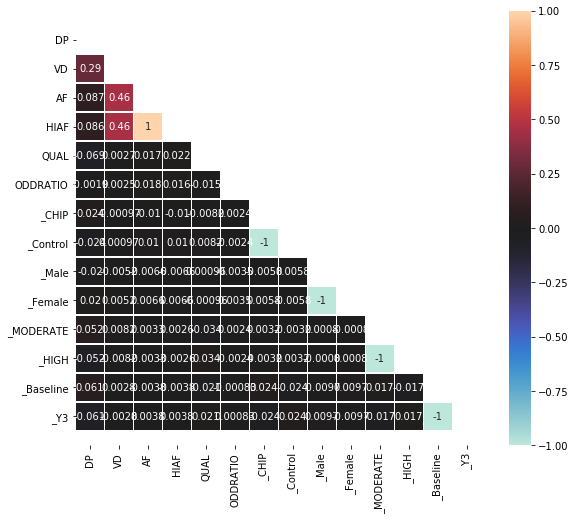

In [52]:
corrs = dfm1.corr() # calculate the correlation table
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) 
f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# do some fiddling so that the top and bottom are not obscured
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);